# Exercise 1

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

student_score = pd.read_csv('Dataset student_score.csv')

print(student_score.head())

slope, intercept, r_value, p_value, std_err = stats.linregress(student_score['Xi'], student_score['Yi'])

print(f"slope: {slope}")
print(f"y-intercept: {intercept}")
print(f"The linear regression equation is: y = {slope:.2f}x + {intercept:.2f}")
print(f"If a student scored 80 on the test, we would expect them to get a grade of: {slope * 80 + intercept:.2f}")

pred = [slope * i + intercept for i in student_score['Xi']]
result = student_score['Yi'].values

print(f'Mean Squared Error: {mean_squared_error(pred, result)}')

print(f'R-Squared: {r_value ** 2}')

print('Based on the size of the Mean Squared Error and R-Squared value, the regression equation does not fit the line very well.')

   Student  Xi  Yi
0        1  95  85
1        2  85  95
2        3  80  70
3        4  70  65
4        5  60  70
slope: 0.6438356164383562
y-intercept: 26.78082191780822
The linear regression equation is: y = 0.64x + 26.78
If a student scored 80 on the test, we would expect them to get a grade of: 78.29
Mean Squared Error: 65.4794520547945
R-Squared: 0.4803218090889323
Based on the size of the Mean Squared Error and R-Squared value, the regression equation does not fit the line very well.


# Exercise 2

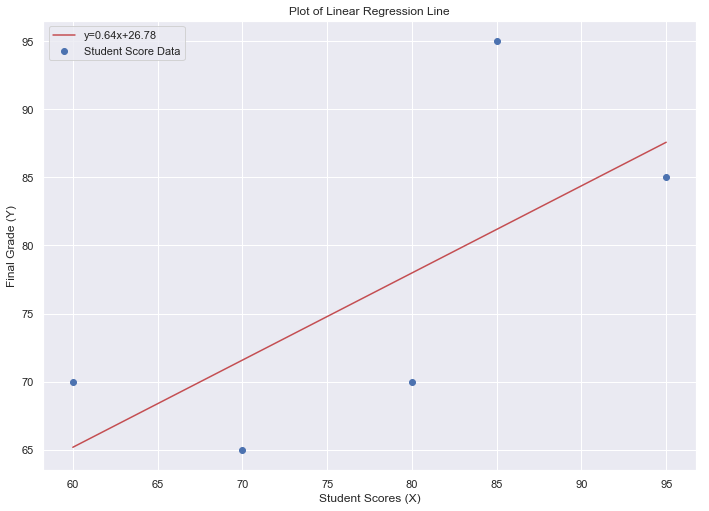

In [36]:
import pandas as pd
from matplotlib import pyplot as plt

student_score = pd.read_csv('Dataset student_score.csv')

plt.title('Plot of Linear Regression Line')
plt.xlabel('Student Scores (X)')
plt.ylabel('Final Grade (Y)')
plt.scatter(student_score['Xi'], student_score['Yi'], label='Student Score Data')
x = student_score['Xi']
y = [i * 0.64 + 26.78 for i in x]
plt.plot(x, y, '-r', label='y=0.64x+26.78')
plt.legend(loc='upper left')
plt.show()

# Exercise 3

In [37]:
import pandas as pd
from scipy import stats

student_score = pd.read_csv('Dataset student_score.csv')

slope, intercept, r_value, p_value, std_err = stats.linregress(student_score['Xi'], student_score['Yi'])

"Source: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html"
print(f'R-Squared value = {r_value**2:.2f}')

R-Squared value = 0.48


# Exercise 4

Exercise: 4.1


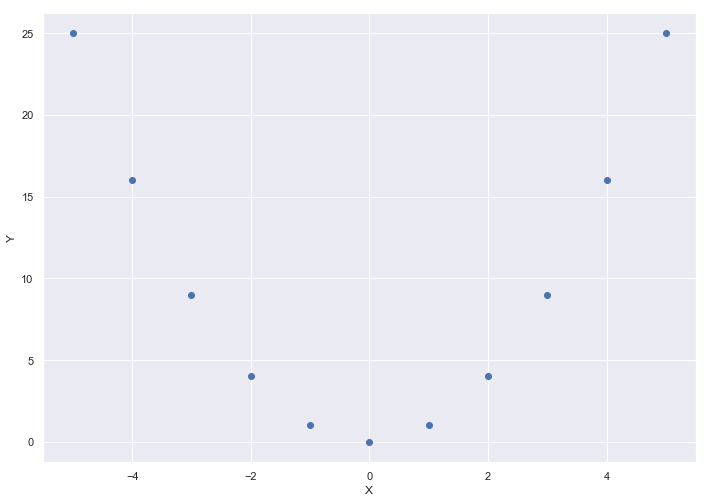

Exercise: 4.2
This is a polynomial regression model (Quadratic fit)


In [38]:
import pandas as pd
from matplotlib import pyplot as plt

x = [-4,-2,1,3,-1,-5,4,2,0,-3,5]
y = [16,4,1,9,1,25,16,4,0,9,25]

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y)

print('Exercise: 4.1')
plt.show()

print("Exercise: 4.2")
print("This is a polynomial regression model (Quadratic fit)")

# Exercise 5

/Users/raunakbajaj/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


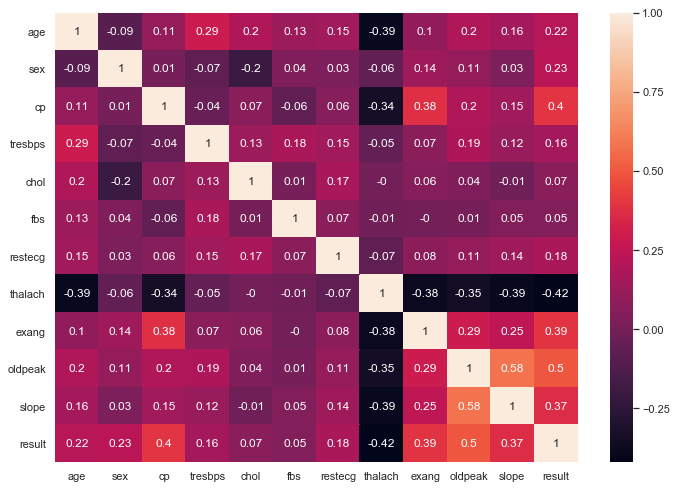

In [39]:
import pandas as pd

import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sbn

data = pd.read_csv('Dataset heart-disease-dataset.csv')

# print(data.head())
# print(data.describe())

# Remove '?' from dataset
for col in data.columns:
    data = data[data[col] != '?']

# Generate correlation matrix 
correlation_matrix = data.corr().round(2)
sbn.set(rc={'figure.figsize': (11.7, 8.27)})
sbn.heatmap(data=correlation_matrix, annot=True)

In [40]:
# The oldpeak variable has the strongest correlation with result
X_oldpeak = data['oldpeak']
y_result = data['result']

X_oldpeak = np.array(X_oldpeak).reshape(-1, 1)
y_result = np.array(y_result).reshape(-1, 1)

In [41]:
# Split training and testing data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_oldpeak, y_result, test_size=0.2, random_state=3)

# Run simple linear regression
lr = linear_model.LinearRegression()
lr.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_pred_1 = lr.predict(X_test_1)

mse = mean_squared_error(y_test_1, y_pred_1)
r_squared = round(lr.score(X_test_1, y_test_1), 2)

print('Model Performance')
print('___________________________')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared Value: {r_squared}')
print('The performance metrics MSE and R-Squared indicate poor performance using the simple linear regression model.')

Model Performance
___________________________
Mean Squared Error: 0.9213152444460694
R-Squared Value: 0.41
The performance metrics MSE and R-Squared indicate poor performance using the simple linear regression model.


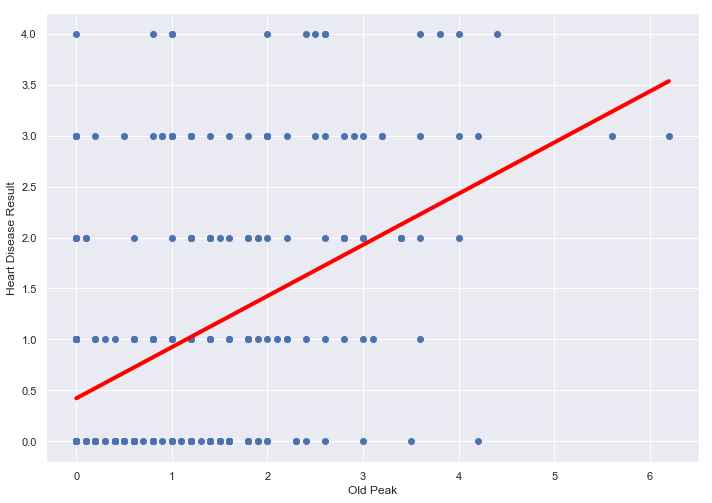

In [43]:
pred_space = np.linspace(min(X_oldpeak), max(X_oldpeak)).reshape(-1, 1)
plt.scatter(X_oldpeak, y_result)
plt.plot(pred_space, lr.predict(pred_space), color='red', linewidth=4)
plt.xlabel('Old Peak')
plt.ylabel('Heart Disease Result')
plt.show()

Model Performance
___________________________
Mean Squared Error: 0.5621569414432573
R-Squared Value: 0.64
The muliple linear regression model performed significantly better than the simple linear regression model

Important Features:
Feature: sex   Score: 0.13145092166840838
Feature: cp   Score: 0.18148128339645256
Feature: restecg   Score: 0.12981116680499963
Feature: exang   Score: 0.2525060863171801
Feature: oldpeak   Score: 0.13357744745525824
Feature: slope   Score: 0.2176797476435477
Feature: ca   Score: 0.41924975099877415
Feature: thal   Score: 0.15451146532076754

Insignificant Features:
Feature: age   Score: -0.009989216272989607
Feature: tresbps   Score: 0.00296811490611449
Feature: chol   Score: 0.000932116194191146
Feature: fbs   Score: -0.13928938780340064
Feature: thalach   Score: -0.004953221926035978


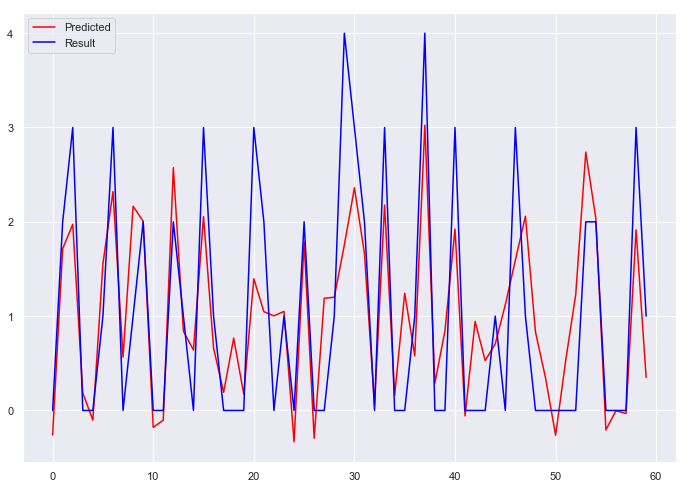

In [55]:
x_cols = [col for col in data.columns if col!="result"]

X = data[x_cols]
y = data['result'].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=3)

multi_lr = linear_model.LinearRegression()

multi_lr.fit(X_train_1, y_train_1)

y_pred_1 = multi_lr.predict(X_test_1)

mse = mean_squared_error(y_test_1, y_pred_1)
r_squared = round(multi_lr.score(X_test_1, y_test_1), 2)

print('Model Performance')
print('___________________________')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared Value: {r_squared}')
print('The muliple linear regression model performed significantly better than the simple linear regression model')
importance = multi_lr.coef_
importance_dict = {}

# List important features
print('\nImportant Features:')
for i in range(len(x_cols)):
    importance_dict[x_cols[i]] = importance[i]
    if importance[i] > 0.05:
        print(f'Feature: {x_cols[i]}   Score: {importance[i]}')

print('\nInsignificant Features:')
for i in range(len(x_cols)):
    if importance[i] < 0.05:
        print(f'Feature: {x_cols[i]}   Score: {importance[i]}')
        
plt.clf()
plt.plot(y_pred_1, 'red', label='Predicted')
plt.plot(y_test_1, 'blue', label='Result')
plt.legend(loc='upper left')
plt.show()

In [62]:
importance_dict = dict(filter( lambda item: item[1] > 0.05, importance_dict.items()))


In [65]:
# Removing insignificant varibales
x_cols = [col for col in data.columns if col!="result" and col in importance_dict.keys()]

X = data[x_cols]
y = data['result']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=3)

multi_lr = linear_model.LinearRegression()

multi_lr.fit(X_train_1, y_train_1)

y_pred_1 = multi_lr.predict(X_test_1)

mse = mean_squared_error(y_test_1, y_pred_1)
r_squared = round(multi_lr.score(X_test_1, y_test_1), 2)

print('Model Performance')
print('___________________________')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared Value: {r_squared}')
print('After removing insignificant variables, there is no significant difference in the performance of the multiple linear regression model.')

importance = multi_lr.coef_
importance_dict = {}
print('\nImportant Features')
for i in range(len(x_cols)):
    importance_dict[x_cols[i]] = importance[i]
    if importance[i] > 0.05:
        print(f'Feature: {x_cols[i]}   Score: {importance[i]}')

Model Performance
___________________________
Mean Squared Error: 0.5612379946005127
R-Squared Value: 0.64
After removing insignificant variables, there is no significant difference in the performance of the multiple linear regression model.

Important Features
Feature: sex   Score: 0.12665836176465117
Feature: cp   Score: 0.19753851128578698
Feature: restecg   Score: 0.13166048079459358
Feature: exang   Score: 0.3067128054194667
Feature: oldpeak   Score: 0.15349045572821826
Feature: slope   Score: 0.237754779906623
Feature: ca   Score: 0.4025981234923676
Feature: thal   Score: 0.15787919782164633


/Users/raunakbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raunakbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Performance
___________________________
Mean Squared Error: 0.9333333333333333
R-Squared Value: 0.65
When running the logistic regression model, there is a small increase in the R-squared value and an increase in the mean squared error. Initial results do not indicate an improvement in performance


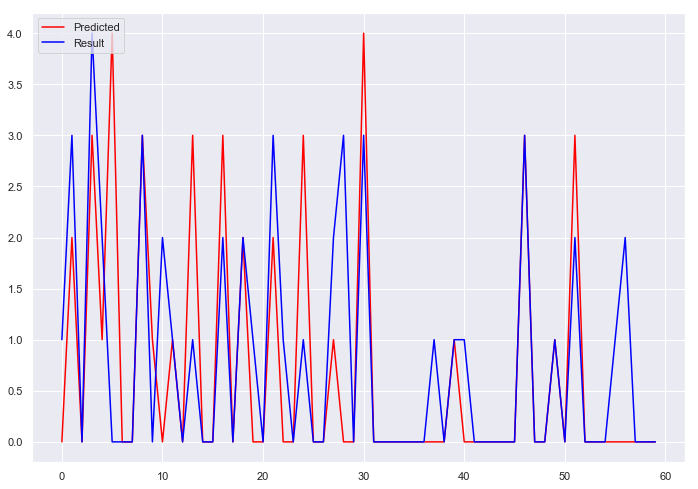

In [58]:
# Logistic Regression

x_cols = [col for col in data.columns if col!="result"]

X = data[x_cols]
y = data['result'].values

# y = [i  if i==0 else 1 for i in data['result']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=5)

multi_lr = linear_model.LogisticRegression(max_iter=10000)

multi_lr.fit(X_train_1, y_train_1)

y_pred_1 = multi_lr.predict(X_test_1)

mse = mean_squared_error(y_test_1, y_pred_1)
r_squared = round(multi_lr.score(X_test_1, y_test_1), 2)

print('Model Performance')
print('___________________________')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared Value: {r_squared}')
print('When running the logistic regression model, there is a small increase in the R-squared value and an increase in the mean squared error. Initial results do not indicate an improvement in performance.')

plt.clf()
plt.plot(y_pred_1, 'red', label='Predicted')
plt.plot(y_test_1, 'blue', label='Result')
plt.legend(loc='upper left')
plt.show()

Model Performance
___________________________
Mean Squared Error: 0.11666666666666667
R-Squared Value: 0.88
After tranforming the data, we see a significant improvement in the R-squared value and a reduction in the mean squared error. This model performs much better than the simple and multiple linear regression models. Overall, the logistic regression model can make predictions more accurately.


/Users/raunakbajaj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


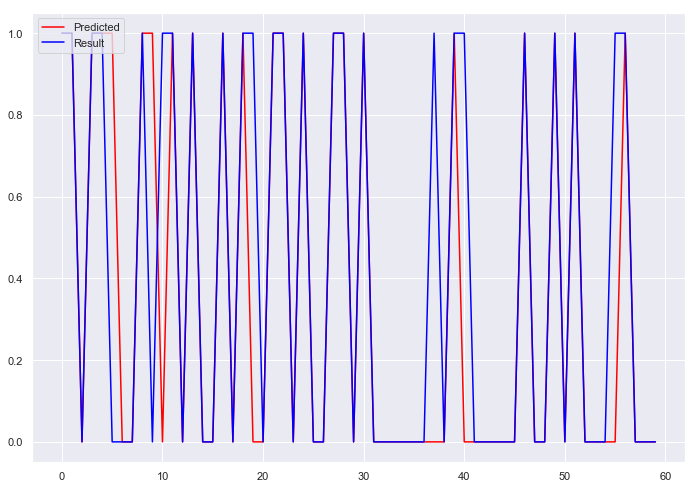

In [61]:
# Logistic Regression

x_cols = [col for col in data.columns if col!="result"]

X = data[x_cols]
# Transform results data into binary where 0=No heart disease and 1=Heart Disease
y = [i  if i==0 else 1 for i in data['result']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=5)

multi_lr = linear_model.LogisticRegression(max_iter=10000)

multi_lr.fit(X_train_1, y_train_1)

y_pred_1 = multi_lr.predict(X_test_1)

mse = mean_squared_error(y_test_1, y_pred_1)
r_squared = round(multi_lr.score(X_test_1, y_test_1), 2)

print('Model Performance')
print('___________________________')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared Value: {r_squared}')
print('After tranforming the data, we see a significant improvement in the R-squared value and a reduction in the mean squared error. This model performs much better than the simple and multiple linear regression models. Overall, the logistic regression model can make predictions more accurately.')

plt.clf()
plt.plot(y_pred_1, 'red', label='Predicted')
plt.plot(y_test_1, 'blue', label='Result')
plt.legend(loc='upper left')
plt.show()